<html> <h1> CNN </h1> </html>

![ML_Pipeline_Diagram](ML_Pipeline_Diagram.png)

<html> <h2 style="color:#00B050;"> 0. Setup and Module Imports </h2> </html>

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<html> <h2 style="color:#4EA72E;"> 1. Merge Ask and Bid Datasets </h2> </html>

<html> <h3 style="color:#4EA72E;"> Import Ask and Bid Datasets and Merge </h3> </html>

In [7]:
#Import Ask data
dataA = pd.read_csv('XAGUSD_5 Mins_Ask_2023.01.01_2023.06.30.csv')
#Import Bid Data
dataB = pd.read_csv('XAGUSD_5 Mins_Bid_2023.01.01_2023.06.30.csv')

<html> <h3 style="color:#4EA72E;"> Merge </h3> </html>

In [9]:
#Merge Ask & Bid Datasets
Combo_Data = dataB.merge(dataA, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')

#Display head of combined data set just to check
Combo_Data.head()

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044


<html> <h3 style="color:#4EA72E;"> Rename Columns </h3> </html>

In [11]:
#Rename the Columns to something more sensible
Combo_Data.columns = ['Time (UTC)', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

Combo_Data.head()

,Time (UTC),Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2023.01.02 23:00:00,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510
1,2023.01.02 23:05:00,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550
2,2023.01.02 23:10:00,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820
3,2023.01.02 23:15:00,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940
4,2023.01.02 23:20:00,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044


In [12]:
#Save the new combined data set to a new file
#The name of this file is contextual to the data - e.g. Silver Ask Bid
file_obj2 = open('Silver_ASK_BID_Combo_Data.csv', 'w')
Combo_Data.to_csv('Silver_ASK_BID_Combo_Data.csv', encoding='utf-8', index=False)
file_obj2.close()

In [13]:
#Clear Combo Data AND DataA/B
Combo_Data = []
DataA = []
DataB = []

In [14]:
#Import new combined data set
data = pd.read_csv('Silver_ASK_BID_Combo_Data.csv', low_memory=False, sep=',')

<html> <h2 style="color:#D86ECC;"> 2. Plot Price and Volume Charts </h2> </html>

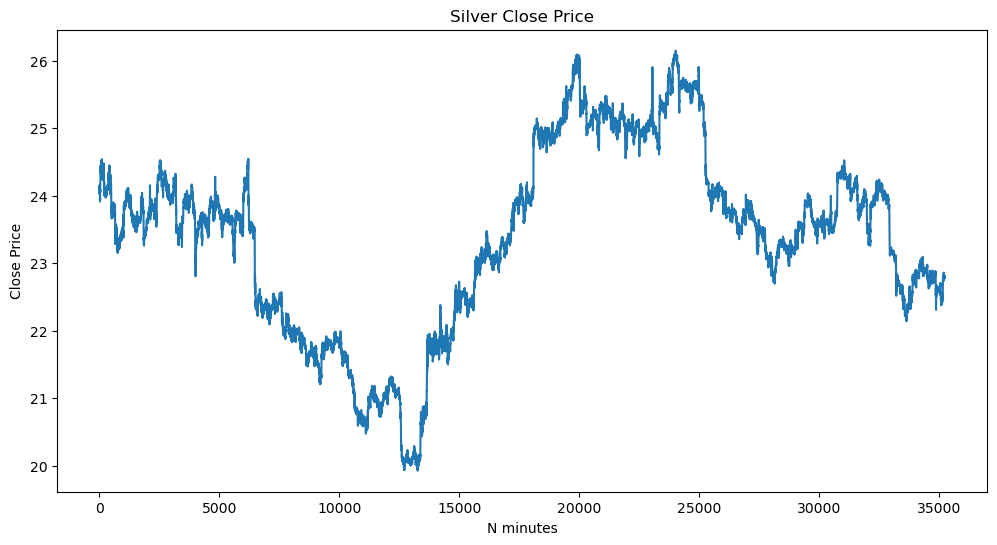

In [16]:
#Plot Ask Close Price Data
plt.figure(figsize=(12,6))
plt.plot(data['Close_Ask'])
plt.title('Silver Close Price')
plt.xlabel('N minutes')
plt.ylabel('Close Price')
plt.show()

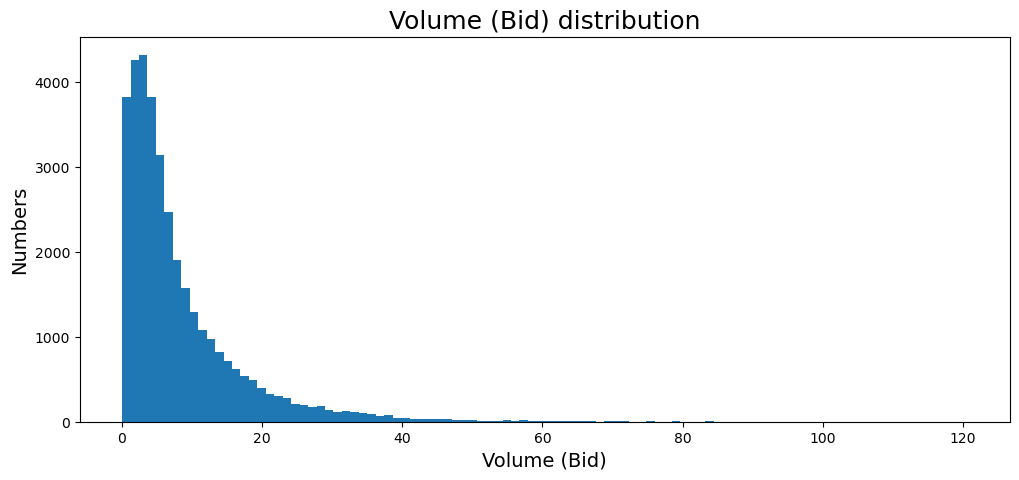

In [17]:
#Plot Bid Volume Data
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Bid'],bins=100)
plt.title('Volume (Bid) distribution', size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid)',size=14);

### Calculate Deltas

In [19]:
# Delta of trading volumes (as well as the modulus of this delta) between Ask 
# and Bid volumes are added as additional parameters

data["Volume_Delta"] = data["Volume_Ask"] - data["Volume_Bid"]
data["Volume_Delta_abs"] = (data["Volume_Ask"] - data["Volume_Bid"]).abs()

In [20]:
#Calculate Deltas for Prices
data["Open_Delta"] = data["Open_Ask"]  - data["Open_Bid"]
data["High_Delta"] = data["High_Ask"]  - data["High_Bid"]
data["Low_Delta"]  = data["Low_Ask"]   - data["Low_Bid"]
data["Close_Delta"] = data["Close_Ask"] - data["Close_Bid"]

In [21]:
data.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000,35220.000000
mean,23.357365,23.374611,23.338437,23.357367,8.283187,23.387577,23.404824,23.368703,23.387501,35.095338,26.812151,26.908678,0.030212,0.030212,0.030266,0.030134
std,1.368781,1.368825,1.368926,1.368867,8.976407,1.368779,1.368797,1.368944,1.368861,39.024921,33.422609,33.344942,0.003245,0.003380,0.005014,0.003851
min,19.893000,19.914000,19.888000,19.893000,0.000000,19.923000,19.944000,19.918000,19.923000,0.000000,-48.791200,0.000000,0.011000,0.018000,0.001000,0.012000
25%,22.421750,22.440000,22.400000,22.421000,2.611050,22.452000,22.470000,22.430000,22.451000,9.467675,5.170550,5.237100,0.030000,0.030000,0.030000,0.030000
50%,23.560000,23.576000,23.543000,23.560000,5.331100,23.590000,23.607000,23.573000,23.590000,22.237450,14.907800,14.937300,0.030000,0.030000,0.030000,0.030000
75%,24.122000,24.144000,24.103000,24.122000,10.686275,24.153000,24.174000,24.133000,24.152000,46.639375,36.154925,36.159175,0.030000,0.030000,0.030000,0.030000
max,26.118000,26.123000,26.098000,26.118000,120.651700,26.148000,26.153000,26.128000,26.148000,365.632200,317.585800,317.585800,0.185000,0.222000,0.409000,0.309000


### Drop Time

In [23]:
data = data.drop(['Time (UTC)'],axis=1)

In [24]:
data.head()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,24.036,24.059,24.017,24.059,0.3480,24.102,24.125,24.083,24.125,0.3510,0.0030,0.0030,0.066,0.066,0.066,0.066
1,24.064,24.130,24.064,24.092,1.8458,24.094,24.188,24.094,24.141,1.1550,-0.6908,0.6908,0.030,0.058,0.030,0.049
2,24.094,24.098,23.972,23.977,0.9030,24.143,24.148,24.022,24.027,0.8820,-0.0210,0.0210,0.049,0.050,0.050,0.050
3,23.977,23.980,23.938,23.980,0.8940,24.026,24.028,23.986,24.028,0.8940,0.0000,0.0000,0.049,0.048,0.048,0.048
4,23.978,24.024,23.976,24.023,0.8880,24.026,24.073,24.023,24.073,0.9044,0.0164,0.0164,0.048,0.049,0.047,0.050


### Create Y Columns

In [26]:
data['Y_High_Bid'] = data['High_Bid']
data['Y_Low_Ask'] = data['Low_Bid'] + data['Low_Delta']

In [27]:
#Removes the Ask Columns
#data2=data.drop(['Open_Ask','High_Ask','Low_Ask','Close_Ask'],axis=1)

<html> <h2 style="color:#61CBF4;"> 3. Split Data Set into Input (X) and Output (y) Matrixes </h2> </html>  

In [29]:
#Seperate X and y data sets
#X is everything except the Y_High_Bid and Y_Low_Ask columns
data_X = data.drop(['Y_High_Bid', 'Y_Low_Ask'], axis=1)
#y is just the Y_High_Bid and Y_Low_Ask columns
data_y = data[['Y_High_Bid', 'Y_Low_Ask']]

In [30]:
data_X.shape

(35220, 16)

In [31]:
data_y.shape

(35220, 2)

<html> <h2 style="color:#0F9ED5;"> 4. Shift the Min & Max Prices </h2> </html>

#### The Min prices for this Silver Data Set are the Low_Ask column & the Max Prices are the High_Bid column

In [34]:
data_y = data_y.shift(-1)

In [35]:
data_y.tail(5)

,Y_High_Bid,Y_Low_Ask
35215,22.751,22.775
35216,22.751,22.776
35217,22.761,22.774
35218,22.766,22.786
35219,NaN,NaN


In [36]:
data_y = data_y.dropna().reset_index(drop=True)

In [37]:
data_y.tail(5)

,Y_High_Bid,Y_Low_Ask
35214,22.752,22.771
35215,22.751,22.775
35216,22.751,22.776
35217,22.761,22.774
35218,22.766,22.786


In [38]:
data_X = data_X[:data_y.shape[0]]

In [39]:
print(data_X.shape, data_y.shape)

(35219, 16) (35219, 2)


<html> <h2 style="color:#0B76A0;"> 5a. Split Data into Train & Test </h2> </html>

#### Reminder: Data should be split into Train and Test before Normalisation!

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.1, shuffle=False, stratify=None, random_state=101)

<html> <h2 style="color:#0B76A0;"> 5. Normalise the Data if Necessary </h2> </html>

### IMPORTANT NOTE:

### Normalisation should only ever be scaled based upon the TRAINING DATA and not Test data!!!

### Min Max Scaler useage:

Here only volume data is being scaled using the Min Max Scaler method, but depending on the data, this method could be applied to the whole dataset.

In [46]:
volume_scaler = MinMaxScaler()
price_scaler = MinMaxScaler()

In [47]:
volume_columns = [5, 10]  # Because 'Volume_Bid' and 'Volume_Ask' are at positions 5 and 10
# Convert back to DataFrame to apply transformations, then convert back to NumPy arrays
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Apply transformations on DataFrame columns
X_train_df.iloc[:, volume_columns] = volume_scaler.fit_transform(X_train_df.iloc[:, volume_columns])
X_test_df.iloc[:, volume_columns] = volume_scaler.transform(X_test_df.iloc[:, volume_columns])

# Convert back to NumPy arrays
X_train = X_train_df.values
X_test = X_test_df.values

In [48]:
price_columns = list(set(range(X_train.shape[1])) - set(volume_columns))
X_train[:, price_columns] = X_train[:, price_columns] / 10
X_test[:, price_columns] = X_test[:, price_columns] / 10

In [49]:
y_train = y_train / 10
y_test = y_test / 10

### Scaling Options:

Fixed scaling like above should be used for datasets such as commodities. <br>
For data in the low 10's (i.e. less than 100) divide by 10.<br>
For data that is close to 100 however, e.g. 80-90, divide by 100.<br>
For data that is over 100, divide by 100.<br>
For data that is close to or over 1000, divide by 1000.

In [51]:
data_length = len(data)
data_length

35220

### Manual Normalisation Methods Below!

#### Note: These are not used in this Pipeline and as such need to be adjusted so that they are applied to both Input (X) Train and Test and Output (y) Train and Test

#### Calculating Scales

##### Remember: This should ONLY be done using the TRAINING DATA!

In [54]:
#max_price = (train['High_Bid'] + train['High_Delta']).max()
#max_price

In [55]:
#min_price = train['Low_Bid'].min()
#min_price

In [56]:
#max_volume = max(max(train['Volume_Bid']), max(train[ 'Volume_Ask']))
#max_volume

In [57]:
#max_Delta = max(max(train[ 'Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
#max_Delta

In [58]:
#max_Delta = round(max_Delta, 3)
#max_Delta

In [59]:
#min_Delta = min(min(train[ 'Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
#min_Delta

In [60]:
#min_Delta = round(min_Delta, 3)
#min_Delta

In [61]:
#max_volume_Delta = train['Volume_Delta'].max()
#max_volume_Delta

In [62]:
#min_volume_Delta = train[ 'Volume_Delta'].min()
#min_volume_Delta

In [63]:
#max_volume_Delta_abs = train['Volume_Delta_abs'].max()
#max_volume_Delta_abs

In [64]:
#min_volume_Delta_abs = train['Volume_Delta_abs'].min()
#min_volume_Delta_abs

#### Applying Scales

##### Remember: This needs to be applied to both Input (X) and Output (y) train and test datasets!

In [66]:
#data['Open_Bid'] = ( data['Open_Bid'] - min_price ) / (max_price-min_price)
#data['High_Bid']  = ( data['High_Bid']  - min_price ) / (max_price-min_price)
#data['Low_Bid']   = ( data['Low_Bid']   - min_price ) / (max_price-min_price)
#data['Close_Bid'] = ( data['Close_Bid'] - min_price ) / (max_price-min_price)
#data['Y_High_Bid'] = ( data['Y_High_Bid'] - min_price ) / (max_price-min_price)
#data['Y_Low_Ask']  = ( data['Y_Low_Ask']  - min_price ) / (max_price-min_price)

In [67]:
#data['Volume_Ask']  = data['Volume_Ask'] / max_volume
#data['Volume_Bid']  = data['Volume_Bid'] / max_volume

In [68]:
#data['Volume_Delta'] = ( data['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [69]:
#data['Volume_Delta_abs']  = data['Volume_Delta_abs'] / max_volume_Delta_abs

In [70]:
#data['Open_Delta']  = ( max_Delta - data['Open_Delta'] )  / (max_Delta-min_Delta)
#data['High_Delta']  = ( max_Delta - data['High_Delta'] )  / (max_Delta-min_Delta)
#data['Low_Delta']   = ( max_Delta - data['Low_Delta'] )   / (max_Delta-min_Delta)
#data['Close_Delta'] = ( max_Delta - data['Close_Delta'] ) / (max_Delta-min_Delta)

In [71]:
# Save Normalised Data Set as a new file

file_obj1 = open('Silver_ASK_BID_Normalised_Data.csv', 'w')
data.to_csv('Silver_ASK_BID_Normalised_Data.csv', encoding='utf-8', index=False)
file_obj1.close()

<html> <h3 style="color:#7030A0;"> 6a. Create Numpys in preperation for creating the 3D Tensors </h3> </html> 

In [73]:
# Create inputs Numpy

X_train = np.array(X_train) 

with np.printoptions(precision=4):
    print("X_train:")
    print(X_train[:2,:])  
    print('\n')
    print(X_train[-2:,:]) 

print("numpy size: = ", X_train.shape)
print("type: ", X_train.dtype) 

X_train:
[[2.4036e+00 2.4059e+00 2.4017e+00 2.4059e+00 3.4800e-02 6.7133e-01
  2.4125e+00 2.4083e+00 2.4125e+00 3.5100e-02 1.3318e-01 3.0000e-04
  6.6000e-03 6.6000e-03 6.6000e-03 6.6000e-03]
 [2.4064e+00 2.4130e+00 2.4064e+00 2.4092e+00 1.8458e-01 6.7004e-01
  2.4188e+00 2.4094e+00 2.4141e+00 1.1550e-01 1.3129e-01 6.9080e-02
  3.0000e-03 5.8000e-03 3.0000e-03 4.9000e-03]]


[[2.3674 2.3682 2.3664 2.3677 0.1027 0.6074 2.3712 2.3694 2.3707 0.3179
  0.139  0.2152 0.003  0.003  0.003  0.003 ]
 [2.3679 2.3693 2.3665 2.3693 0.2133 0.6082 2.3723 2.3695 2.3723 0.6202
  0.1443 0.4069 0.003  0.003  0.003  0.003 ]]
numpy size: =  (31697, 16)
type:  float64


In [74]:
# Create inputs Numpy

X_test = np.array(X_test) 

with np.printoptions(precision=4):
    print("X_test:")
    print(X_test[:2,:])  
    print('\n')
    print(X_test[-2:,:]) 

print("numpy size: = ", X_test.shape)
print("type: ", X_test.dtype) 

X_test:
[[2.3684 2.3688 2.3665 2.3667 0.2076 0.609  2.3718 2.3695 2.3697 0.6526
  0.1453 0.445  0.003  0.003  0.003  0.003 ]
 [2.3672 2.3709 2.3665 2.37   0.6097 0.6071 2.3739 2.3695 2.373  1.8517
  0.1671 1.242  0.003  0.003  0.003  0.003 ]]


[[2.2751 2.2751 2.2746 2.2746 0.0069 0.4591 2.2781 2.2776 2.2776 0.0421
  0.1341 0.0352 0.003  0.003  0.003  0.003 ]
 [2.2746 2.2761 2.2736 2.2756 0.0216 0.4583 2.2797 2.2774 2.2786 0.0684
  0.1344 0.0468 0.003  0.0036 0.0038 0.003 ]]
numpy size: =  (3522, 16)
type:  float64


In [75]:
# Create outputs Numpy

y_train = np.array(y_train) 

print("y_train:")
print(y_train[:3,:])  
print('\n')
print(y_train[-3:,:]) 

print("numpy size: = ", y_train.shape)
print("type: ", y_train.dtype) 

y_train:
[[2.413  2.4094]
 [2.4098 2.4022]
 [2.398  2.3986]]


[[2.3682 2.3694]
 [2.3693 2.3695]
 [2.3688 2.3695]]
numpy size: =  (31697, 2)
type:  float64


In [76]:
# Create outputs Numpy

y_test = np.array(y_test) 

print("y_test:")
print(y_test[:3,:])  
print('\n')
print(y_test[-3:,:]) 

print("numpy size: = ", y_test.shape)
print("type: ", y_test.dtype) 

y_test:
[[2.3709 2.3695]
 [2.371  2.3718]
 [2.3723 2.3726]]


[[2.2751 2.2776]
 [2.2761 2.2774]
 [2.2766 2.2786]]
numpy size: =  (3522, 2)
type:  float64


<html> <h2 style="color:#7030A0;"> 6. Create 3D Tensor </h2> </html>  

#### 3D Tensor for use in the CNN/LSTM Neural Network.

In [79]:
from tqdm import tqdm

### Notes on 3D Tensor Values:

<ol><li>n = Total number of samples in the dataset</li>

<li>t = Number of features in each sample</li>

<li>N = 50: Window size or sequence length, which sets the length of the input sequence for each data sample</li></ol>

This means that each 3D input tensor will have a shape (L, 50, t).

### N = 50:
<ol><li>Capturing Temporal Dependencies: A sequence length of 50 allows the model to capture patterns or dependencies over a 50-time-step window. This window size can vary depending on the nature of the data and the desired look-back period.</li>
<li>Balance Between Information and Efficiency: A longer window size gives the model more historical data, but also increases the complexity of the input and requires more memory. N = 50 is often a reasonable choice as it provides a good balance, allowing the model to learn from past patterns without overly large input tensors.</li>
<li>Consistency in Input Shape: By setting N to a fixed value, all input samples are standardized to a shape of (50, t), which is necessary for training neural networks.</li></ol>

In [82]:
n = data_X.shape[0]
t=data_X.shape[1]
N=50

L_train = X_train.shape[0] - N
L_test = X_test.shape[0] - N

print('Size of a X_train three-dimensional inputs tensor: ',L_train,N,t)
print('Size of a X_test three-dimensional inputs tensor: ',L_test,N,t)

Size of a X_train three-dimensional inputs tensor:  31647 50 16
Size of a X_test three-dimensional inputs tensor:  3472 50 16


In [83]:
# create inputs zeros 3D tensors with 'float32'

X_train_3d = np.zeros((L_train, N, t))  # Shape (L_train, N, t)
X_test_3d = np.zeros((L_test, N, t))    # Shape (L_test, N, t)

In [84]:
# create a two-dimensional zeros vector of answers - normalised the High_Bid and Low_Ask prices DURING next 5 minutes

y_train_2d = np.zeros((L_train, 2))    # For 'High_Bid' and 'Low_Ask'
y_test_2d = np.zeros((L_test, 2))

In [85]:
# Populate the 3D tensors and target arrays for training data
for k in tqdm(range(L_train)):
    X_train_3d[k] = X_train[k:k+N]
    y_train_2d[k] = y_train[k+N-1]  # Target is at the end of the sequence

100%|██████████| 31647/31647 [00:00<00:00, 267026.23it/s]


In [86]:
# Populate the 3D tensors and target arrays for testing data
for k in tqdm(range(L_test)):
    X_test_3d[k] = X_test[k:k+N]
    y_test_2d[k] = y_test[k+N-1]

100%|██████████| 3472/3472 [00:00<00:00, 217031.90it/s]


In [87]:
# Display the shapes and sample data for verification
print("X_train_3d shape:", X_train_3d.shape)
print("y_train_2d shape:", y_train_2d.shape)
print("X_test_3d shape:", X_test_3d.shape)
print("y_test_2d shape:", y_test_2d.shape)

X_train_3d shape: (31647, 50, 16)
y_train_2d shape: (31647, 2)
X_test_3d shape: (3472, 50, 16)
y_test_2d shape: (3472, 2)


In [88]:
# Print sample data for inspection
with np.printoptions(precision=4):
    print("\nSample X_train_3d (first sequence):\n", X_train_3d[0])
    print("\nSample y_train_2d (first 5 targets):\n", y_train_2d[:5])
    print("\nSample X_test_3d (first sequence):\n", X_test_3d[0])
    print("\nSample y_test_2d (first 5 targets):\n", y_test_2d[:5])


Sample X_train_3d (first sequence):
 [[2.4036e+00 2.4059e+00 2.4017e+00 2.4059e+00 3.4800e-02 6.7133e-01
  2.4125e+00 2.4083e+00 2.4125e+00 3.5100e-02 1.3318e-01 3.0000e-04
  6.6000e-03 6.6000e-03 6.6000e-03 6.6000e-03]
 [2.4064e+00 2.4130e+00 2.4064e+00 2.4092e+00 1.8458e-01 6.7004e-01
  2.4188e+00 2.4094e+00 2.4141e+00 1.1550e-01 1.3129e-01 6.9080e-02
  3.0000e-03 5.8000e-03 3.0000e-03 4.9000e-03]
 [2.4094e+00 2.4098e+00 2.3972e+00 2.3977e+00 9.0300e-02 6.7791e-01
  2.4148e+00 2.4022e+00 2.4027e+00 8.8200e-02 1.3311e-01 2.1000e-03
  4.9000e-03 5.0000e-03 5.0000e-03 5.0000e-03]
 [2.3977e+00 2.3980e+00 2.3938e+00 2.3980e+00 8.9400e-02 6.5912e-01
  2.4028e+00 2.3986e+00 2.4028e+00 8.9400e-02 1.3317e-01 0.0000e+00
  4.9000e-03 4.8000e-03 4.8000e-03 4.8000e-03]
 [2.3978e+00 2.4024e+00 2.3976e+00 2.4023e+00 8.8800e-02 6.5912e-01
  2.4073e+00 2.4023e+00 2.4073e+00 9.0440e-02 1.3322e-01 1.6400e-03
  4.8000e-03 4.9000e-03 4.7000e-03 5.0000e-03]
 [2.4026e+00 2.4061e+00 2.4026e+00 2.4058e+00 7

<html> <h2 style="color:#E97132;"> 7. Create and Train Neural Network </h2> </html> 

#### Reminder: This Pipeline is using an Convolutional Neural Network (CNN) as the Neural Network method.

In [91]:
print("X_train_3d shape:", X_train_3d.shape)

X_train_3d shape: (31647, 50, 16)


In [92]:
# Create a Sequential model - a neural network, where the Layers go one after another
model = models.Sequential([
    
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(50, 16)),
    
    layers.MaxPooling1D(pool_size=2),
    
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    
    layers.MaxPooling1D(pool_size=2),
    
    layers.Flatten(),
    
    layers.Dense(100, activation='relu'),
    
    layers.Dense(50, activation='relu'),
    
    layers.Dense(2)  # Output layer for two predictions (High_Bid and Low_Ask)
    
])

print(model.summary())

C:\Users\jon\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 48, 64)         │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 22, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 11, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        35,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,764 (194.39 KB)

 Trainable params: 49,764 (194.39 KB)

 Non-trainable params: 0 (0.00 B)

None


In [93]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [94]:
print("X_train shape:", X_train.shape)  # Expected: (samples, 16)
print("y_train shape:", y_train.shape)  # Expected: (samples, 2)

X_train shape: (31697, 16)
y_train shape: (31697, 2)


#### Early Stopping: This is being used here to help try and guard against Overfitting.

In [96]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
history = model.fit(X_train_3d, y_train_2d, epochs=50, validation_split=0.2, callbacks=[early_stopping], batch_size=64)

Epoch 1/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0899 - mae: 0.1261 - val_loss: 6.1955e-04 - val_mae: 0.0176
Epoch 2/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0011 - mae: 0.0247 - val_loss: 4.8500e-04 - val_mae: 0.0169
Epoch 3/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7.6975e-04 - mae: 0.0209 - val_loss: 2.5764e-04 - val_mae: 0.0118
Epoch 4/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.0606e-04 - mae: 0.0169 - val_loss: 1.8833e-04 - val_mae: 0.0101
Epoch 5/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.7851e-04 - mae: 0.0167 - val_loss: 7.6309e-04 - val_mae: 0.0247
Epoch 6/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.3516e-04 - mae: 0.0161 - val_loss: 1.3860e-04 - val_mae: 0.0085
Epoch 7/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.6501e-04 - mae: 0.0169 - val_loss: 7.4472e-04 - val_mae: 0.0253
Epoch 8/50
396/396 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.0935e-04 - mae: 0.0178 - val_loss: 1.9902e-04 - val_mae: 0.0107


In [97]:
#history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2, verbose=1)

<html> <h2 style="color:#FF0000;">  8. Calculate MAE and MSE Error </h2> </html> 

In [99]:
mse, mae = model.evaluate(X_test_3d, y_test_2d, verbose = 1)

print("Mean absolute error: %.5f" % mae)
print("Mean squared error: %.5f" % mse)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9768e-04 - mae: 0.0104
Mean absolute error: 0.00964
Mean squared error: 0.00017


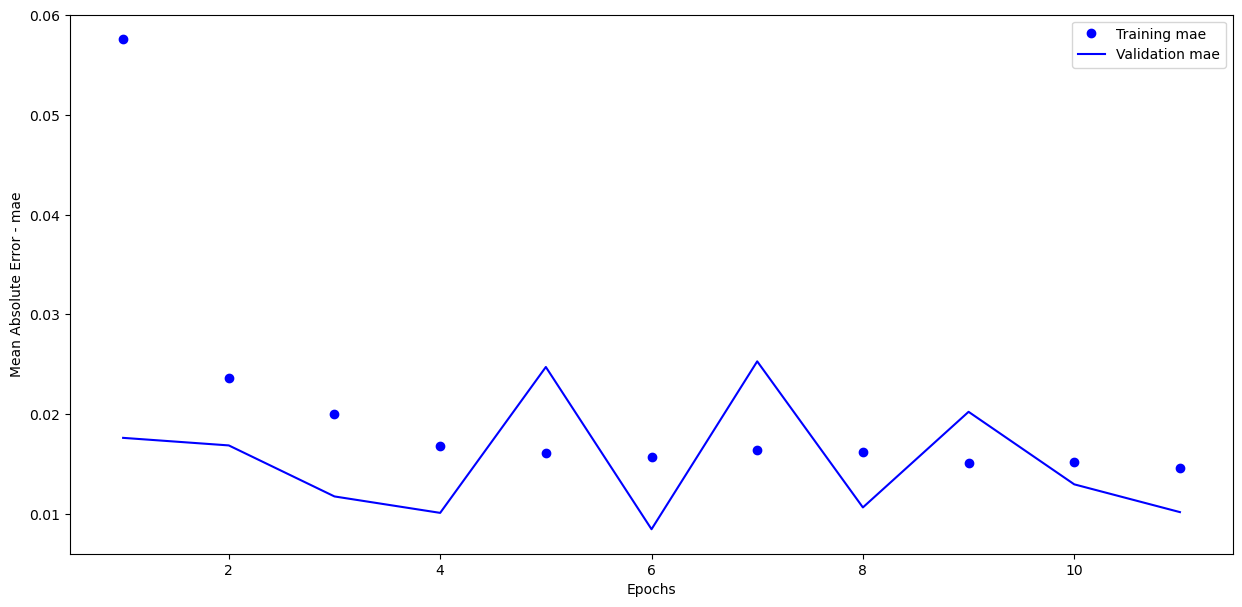

In [100]:
history_dict = history.history

mean_absolute_error_values = history_dict['mae']
val_mean_absolute_error_values = history_dict['val_mae']
epochs = range(1, len(mean_absolute_error_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training mae')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error - mae')
plt.legend()
plt.show()

<html> <h2 style="color:#A02B93;">  9. Prediction and Plot Result Graphs </h2> </html>  

In [210]:
# Generate predictions on the test set
y_pred_scaled = model.predict(X_test_3d)

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Rescale Predictions

In [212]:
# Convert predictions back to the original scale
y_pred = y_pred_scaled * 10

### Get Predictions for High Bid & Low Ask

In [216]:
# Extract predictions for High Bid and Low Ask
high_bid_predictions = y_pred[:, 0]  # First column for High Bid
low_ask_predictions = y_pred[:, 1]   # Second column for Low Ask

### Get value for Last Row Prediction

In [219]:
# Extract last PREDICTED for High Bid
last_high_bid_prediction = y_pred[-1, 0]  # Last row, first column

# Extract last PREDICTED for Low Ask
last_low_ask_prediction = y_pred[-1, 1]   # Last row, second column

### Get value for Last Row Actual

In [222]:
# Extract last ACTUAL for High Bid
last_high_bid_actual = y_test[-1, 0]  # Last row, first column

# Extract last ACTUAL for Low Ask
last_low_ask_actual = y_test[-1, 1]   # Last row, second column

### Display Predictions alongside Actuals

In [225]:
# Display the predictions
print("High Bid Predictions:", high_bid_predictions)
print("Low Ask Predictions:", low_ask_predictions)

# Optionally, compare with actual values from y_test (multiplied by 10 for the original scale)
print("Actual High Bid:", y_test[:, 0] * 10)
print("Actual Low Ask:", y_test[:, 1] * 10)

High Bid Predictions: [23.748123 23.736813 23.758686 ... 22.856415 22.818344 22.83758 ]
Low Ask Predictions: [23.781015 23.78402  23.804352 ... 22.840061 22.890242 22.87162 ]
Actual High Bid: [23.709 23.71  23.723 ... 22.751 22.761 22.766]
Actual Low Ask: [23.695 23.718 23.726 ... 22.776 22.774 22.786]


### Display Last Row Prediction alongside Last Row Actual

In [228]:
#Printing Last Row Predictions and Actuals Rounded to 3 Decmial Places
print("Predicted High Bid:",round(last_high_bid_prediction,3))
print("Actual High Bid:",round(last_high_bid_actual,3))
print("Predicted Low Ask:",round(last_low_ask_prediction,3))
print("Actual High Bid:",round(last_high_bid_actual,3))

Predicted High Bid: 22.838
Actual High Bid: 2.277
Predicted Low Ask: 22.872
Actual High Bid: 2.277


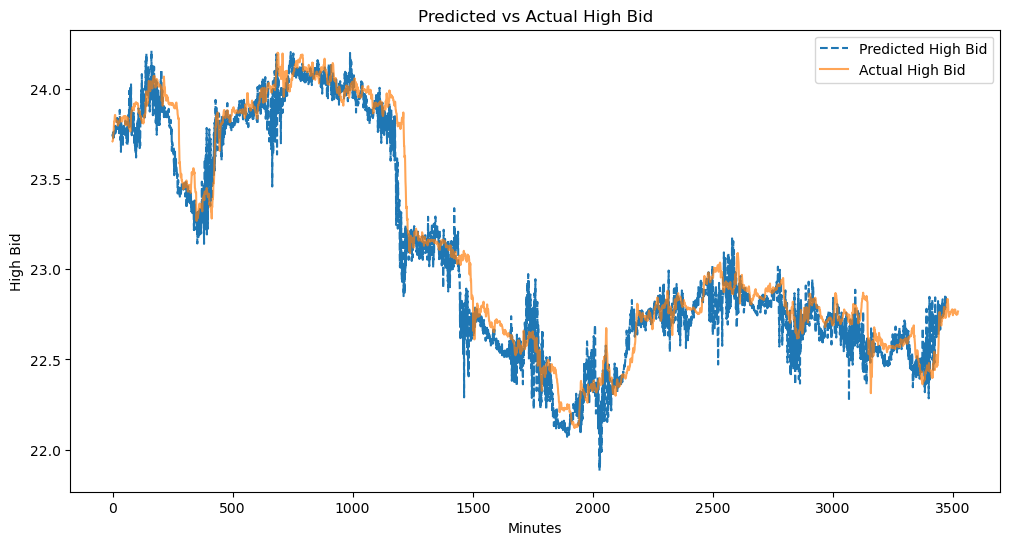

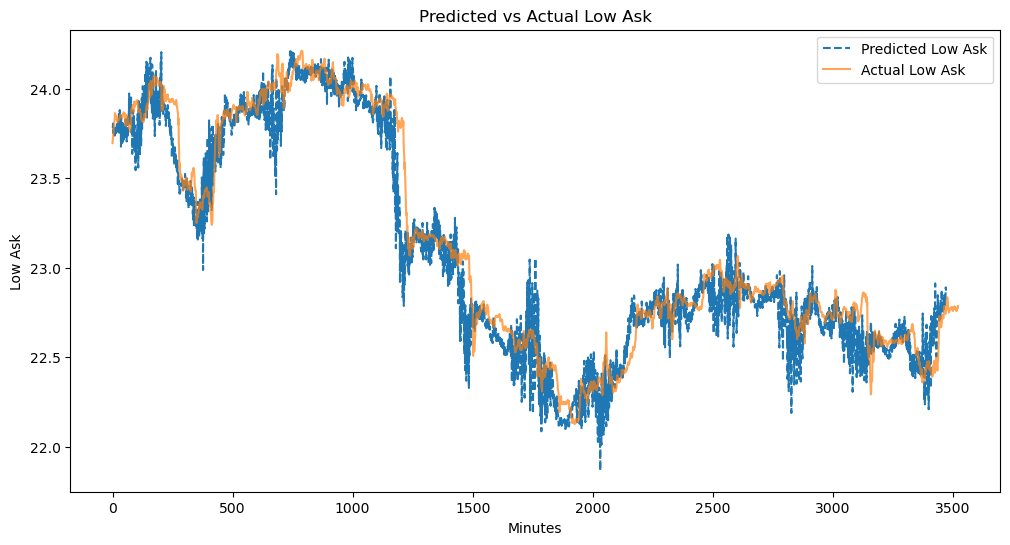

In [106]:
# Plot High Bid predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(high_bid_predictions, label="Predicted High Bid", linestyle='--')
plt.plot(y_test[:, 0] * 10, label="Actual High Bid", alpha=0.7)
plt.title("Predicted vs Actual High Bid")
plt.xlabel("Minutes")
plt.ylabel("High Bid")
plt.legend()
plt.show()

# Plot Low Ask predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(low_ask_predictions, label="Predicted Low Ask", linestyle='--')
plt.plot(y_test[:, 1] * 10, label="Actual Low Ask", alpha=0.7)
plt.title("Predicted vs Actual Low Ask")
plt.xlabel("Minutes")
plt.ylabel("Low Ask")
plt.legend()
plt.show()

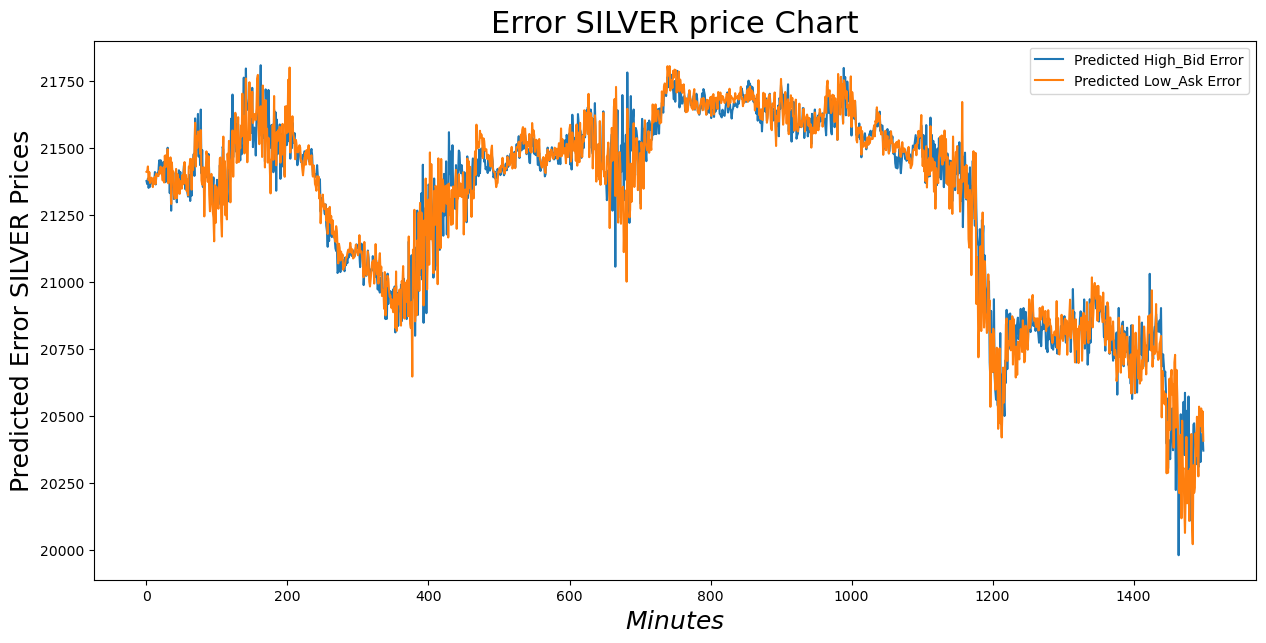

In [107]:
N1=0  # The first minute for the chart  
LL = 1500  # leigt (in minutes) for the chart
N2=N1+LL  # the last minute for the chart
# N2 should be < len(pred)

plt.ion()
fig = plt.figure(figsize=(15,7))  

ax1 = fig.add_subplot(111)

# in $ (absolute price)
a = (y_pred[N1:N2,0] - y_test[N1:N2,0]) *1000
b = (y_pred[N1:N2,1] - y_test[N1:N2,1]) *1000

# in %
#a = (pred[N1:N2,0] - y_test[N1:N2,0]) *1000/ average_price *100
#b = (pred[N1:N2,1] - y_test[N1:N2,1]) *1000/ average_price *100

line1, = ax1.plot(a, label='Predicted High_Bid Error')
line2, = ax1.plot(b, label='Predicted Low_Ask Error')

plt.title('Error SILVER price Chart', size=22)
plt.ylabel('Predicted Error SILVER Prices', size=18)
plt.xlabel('$Minutes$', size=18)
plt.legend(loc='upper right') 

plt.show()